In [19]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import numpy as np

from deepxde.backend import tf
import matplotlib.pyplot as plt
D = 3.8e-11 #m^2/s
C0 = 0.0 #moles/m^3
C1 = 100 #moles/m^3
l = 0.05 #m
def pde(x, y):
   
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
  
    return (dy_t- D*dy_xx)

def f(x):
    return np.sin(np.pi * x / l)
    
def func(x):
    n_terms = 2  # Number of terms in the series to approximate the solution
    result = C0 + (x[:, 0:1] / l) * (C1 - C0)
    for n in range(1, n_terms + 1):
        from scipy.integrate import quad
        integral, _ = quad(lambda x: f(x) * np.sin(n * np.pi * x/ l), 0, l)
        cn = (2 / l) * integral + (2 / (n * np.pi)) * ((-1)**n * (C1 - C0))  
        term = cn * np.exp(-n**2 * np.pi**2 * D * x[:, 1:2] / l**2) * np.sin(n * np.pi * x[:, 0:1] / l)
        result += term
    return result

geom = dde.geometry.Interval(0, l)
timedomain = dde.geometry.TimeDomain(0, 100)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

def boundary_left(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0)

def boundary_right(x, on_boundary):
    return on_boundary and np.isclose(x[0], l)

bc_func_left = lambda x: np.zeros((len(x), 1))
bc_func_right = lambda x: np.full((len(x), 1), 10.0)
bc_left = dde.icbc.DirichletBC(geomtime, bc_func_left, boundary_left)
bc_right = dde.icbc.DirichletBC(geomtime, bc_func_right, boundary_right)

# Initial condition
ic_func = lambda x: np.zeros((len(x), 1))
ic = dde.icbc.IC(geomtime, ic_func, lambda _, on_initial: on_initial)

data = dde.data.TimePDE(geomtime, pde, [bc_left, bc_right, ic], num_domain=40000, solution=func, num_boundary=20000, num_test=10000)

layer_size = [2] + [32] * 5 + [1]
activation = "tanh"
initializer = "Glorot uniform"


net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.0001, metrics=["l2 relative error"])
early_stopping = dde.callbacks.EarlyStopping(min_delta=1e-6, patience=500)
losshistory, train_state = model.train(iterations=100000)

Compiling model...
Building feed-forward neural network...
'build' took 0.064368 s



c:\Users\yesda\anaconda3\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.739752 s

Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [2.92e-04, 1.49e-02, 1.01e+02, nan]         [2.91e-04, 1.49e-02, 1.01e+02, nan]         [1.00e+00]    

Best model at step 0:
  train loss: inf
  test loss: inf
  test metric: 

'train' took 1.301735 s



Compiling model...
Building feed-forward neural network...
'build' took 0.045711 s



c:\Users\yesda\anaconda3\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.510739 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [4.38e+01, 1.23e-02]    [4.95e+01, 1.23e-02]    [1.08e+00]    
1000      [5.29e-04, 2.12e-06]    [7.10e-04, 2.12e-06]    [1.35e-03]    
2000      [5.38e-04, 1.05e-05]    [6.84e-04, 1.05e-05]    [2.85e-03]    
3000      [7.67e-03, 1.82e-04]    [6.46e-03, 1.82e-04]    [1.24e-02]    
4000      [1.35e-03, 2.17e-05]    [1.21e-03, 2.17e-05]    [4.61e-03]    
5000      [3.32e-05, 5.16e-08]    [6.79e-05, 5.16e-08]    [1.60e-04]    
6000      [2.69e-05, 6.05e-08]    [6.39e-05, 6.05e-08]    [2.77e-04]    
7000      [4.75e-03, 1.74e-04]    [3.60e-03, 1.74e-04]    [9.30e-03]    
8000      [4.02e-05, 5.05e-07]    [7.25e-05, 5.05e-07]    [5.95e-04]    
9000      [1.09e-04, 2.86e-06]    [1.62e-04, 2.86e-06]    [1.17e-03]    
10000     [9.41e-04, 4.41e-05]    [9.31e-04, 4.41e-05]    [4.55e-03]    

Best model at step 6000:
  train loss: 2.69e-05
  test loss: 6.40e-05
  test 

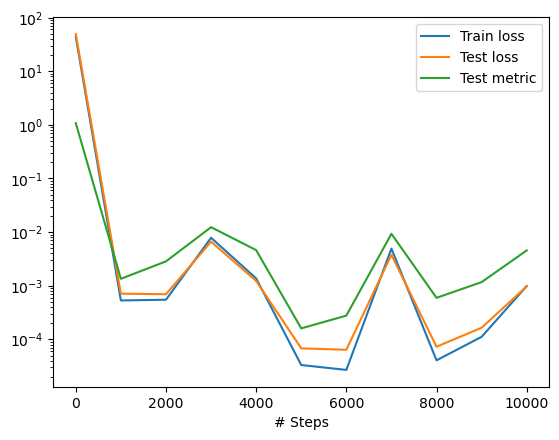

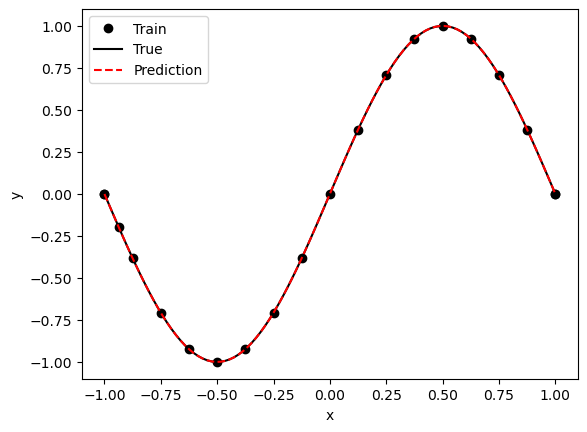

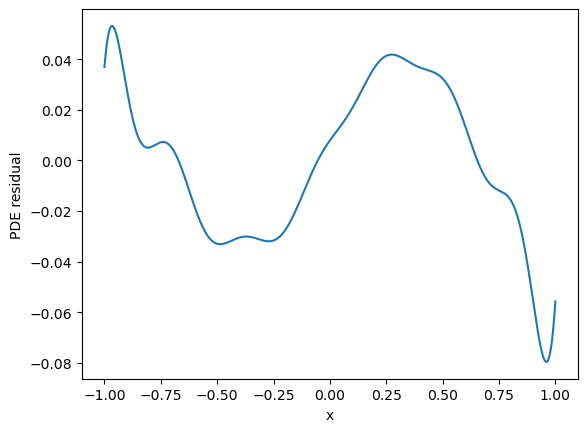

In [18]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Import torch if using backend pytorch
# import torch
# Import jax.numpy if using backend jax
# import jax.numpy as jnp
# Import paddle if using backend paddle
# import paddle


def pde(x, y):
    # Most backends
    dy_xx = dde.grad.hessian(y, x)
    # Backend jax
    # dy_xx, _ = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    # Use torch.sin for backend pytorch
    # return -dy_xx - np.pi ** 2 * torch.sin(np.pi * x)
    # Use jax.numpy.sin for backend jax
    # return -dy_xx - np.pi ** 2 * jnp.sin(np.pi * x)
    # Use paddle.sin for backend paddle
    # return -dy_xx - np.pi ** 2 * paddle.sin(np.pi * x)


def boundary(x, on_boundary):
    return on_boundary


def func(x):
    return np.sin(np.pi * x)


geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=10000)
# Optional: Save the model during training.
# checkpointer = dde.callbacks.ModelCheckpoint(
#     "model/model", verbose=1, save_better_only=True
# )
# Optional: Save the movie of the network solution during training.
# ImageMagick (https://imagemagick.org/) is required to generate the movie.
# movie = dde.callbacks.MovieDumper(
#     "model/movie", [-1], [1], period=100, save_spectrum=True, y_reference=func
# )
# losshistory, train_state = model.train(iterations=10000, callbacks=[checkpointer, movie])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Optional: Restore the saved model with the smallest training loss
# model.restore(f"model/model-{train_state.best_step}.ckpt", verbose=1)
# Plot PDE residual
x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()